In [35]:
# 1. importation des librairies 
import numpy as np
import pandas as pd
import seaborn as sns

In [36]:
# 2. Chargement des données 
data = pd.read_csv('Data/USA_Housing.csv')

In [37]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [39]:
data.drop(columns='Address', inplace=True)

<Axes: >

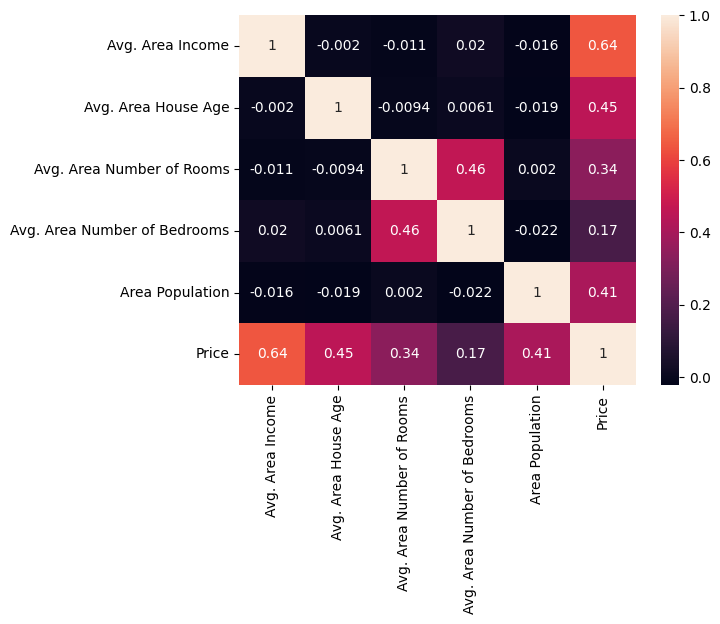

In [40]:
sns.heatmap(data.corr(), annot=True)

In [41]:
# Afficher les noms de toutes les colonnes
print(data.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


In [42]:
print(data.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


In [43]:
data = data[['Avg. Area Income', 'Price']]

In [44]:
print(data.head())

   Avg. Area Income         Price
0      79545.458574  1.059034e+06
1      79248.642455  1.505891e+06
2      61287.067179  1.058988e+06
3      63345.240046  1.260617e+06
4      59982.197226  6.309435e+05


In [45]:
Tab = pd.DataFrame(data)

In [46]:
Tab

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05
...,...,...
4995,60567.944140,1.060194e+06
4996,78491.275435,1.482618e+06
4997,63390.686886,1.030730e+06
4998,68001.331235,1.198657e+06


<Axes: >

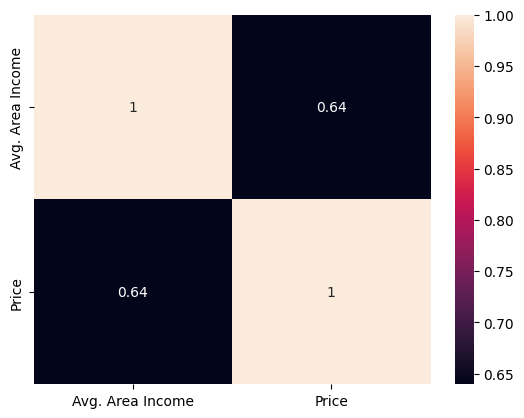

In [47]:
sns.heatmap(data.corr(), annot=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg. Area Income  5000 non-null   float64
 1   Price             5000 non-null   float64
dtypes: float64(2)
memory usage: 78.2 KB


In [49]:
X = data.iloc[ :, :-1].values
Y = data.iloc[ :, -1].values

In [50]:
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]], shape=(5000, 1))

In [51]:
Y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696],
      shape=(5000,))

In [52]:
#X_train, X_test, Y_train, Y_test
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

In [54]:
print("X_Train Shape: ", X_train.shape)
print("X_Test Shape: ", X_test.shape)
print("Y_Train Shape: ", Y_train.shape)
print("Y_Test Shape: ", Y_test.shape)

X_Train Shape:  (3750, 1)
X_Test Shape:  (1250, 1)
Y_Train Shape:  (3750,)
Y_Test Shape:  (1250,)


In [55]:
# Importer l'algorithme de la Régression lineair
from sklearn.linear_model import LinearRegression

In [56]:
modele_lineaire = LinearRegression()

In [57]:
# Entraînement du modèle 
modele_lineaire.fit(X_train, Y_train)

LinearRegression()

In [58]:
# Faire de prédiction 
Y_scores_predits = modele_lineaire.predict(X_test)

In [59]:
Y_scores_predits

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991],
      shape=(1250,))

In [60]:
Y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ],
      shape=(1250,))

In [61]:
resultats = pd.DataFrame(Y_test, Y_scores_predits)

In [62]:
resultats

,0
1.375828e+06,1.435770e+06
1.594792e+06,1.668448e+06
1.378886e+06,1.762215e+06
1.121330e+06,1.106261e+06
1.001248e+06,1.051124e+06
...,...
9.409852e+05,7.054441e+05
1.629427e+06,1.358647e+06
1.092890e+06,9.750058e+05
1.437100e+06,1.393996e+06


In [63]:
# Évaluation du modèle 
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
print("MSE de la Régression lineaire :", mean_squared_error(Y_test, Y_scores_predits))

MSE de la Régression lineaire : 70345556190.3212


In [65]:
print("R2 Score de la régression", r2_score(Y_test, Y_scores_predits))

R2 Score de la régression 0.43322233931263276


In [66]:
# Importer MATPLOTLIB
import matplotlib.pyplot as plt 

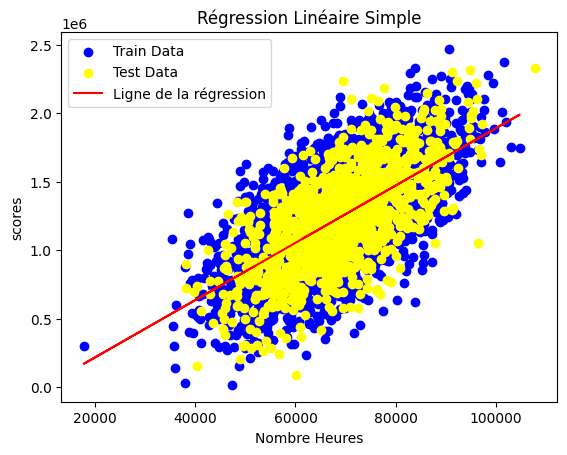

In [67]:
plt.scatter(X_train, Y_train, color='blue', label='Train Data')
plt.scatter(X_test, Y_test, color='yellow', label='Test Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='Ligne de la régression')
plt.xlabel('Nombre Heures')
plt.ylabel('scores')
plt.title('Régression Linéaire Simple')
plt.legend()
plt.show()